<a href="https://colab.research.google.com/github/MK396/SiOC/blob/main/Odszumianie_i_kompresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Odszumianie

In [1]:
import numpy as np
from skimage import io, restoration
from numpy.typing import NDArray
import matplotlib.pyplot as plt

def poissoning(image: NDArray, lambda_value: float) -> np.ndarray:
    # Dodaje zakłócenia Poissona do obrazu, kontrolując poziom zakłóceń za pomocą parametru lambda_value
    noised_image = np.random.poisson(image / image.max() * lambda_value) / lambda_value
    noised_image = np.clip(noised_image * 255, 0, 255).astype(int)
    return noised_image

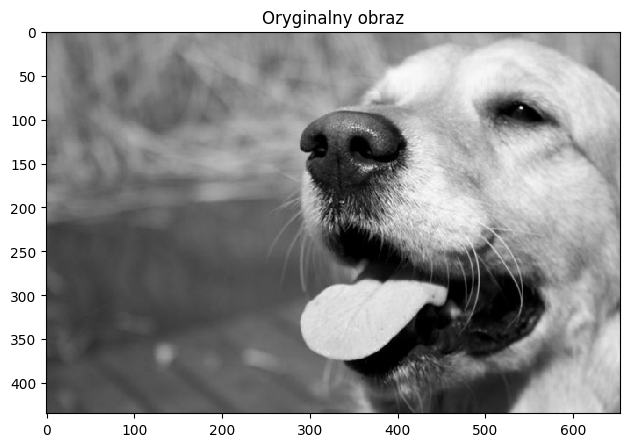

In [2]:
# Wczytanie i wyświetlenie oryginalnego obrazu
obraz_oryginalny = io.imread("/content/drive/MyDrive/pies2.jpg")
io.imshow(obraz_oryginalny)
plt.title('Oryginalny obraz')
plt.show()

In [3]:
# Dodanie szumu Poissona do oryginalnego obrazu
obraz_z_szumem = poissoning(obraz_oryginalny, lambda_value=64)
# Wyświetlenie maksymalnych wartości pikseli w oryginalnym i zakłóconym obrazie
print(obraz_oryginalny.max(), obraz_z_szumem.max())

250 255


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


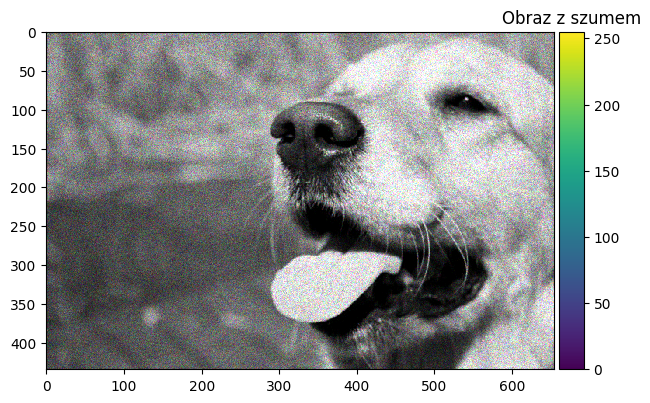

In [4]:
# Wyświetlenie obrazu z dodanym szumem
io.imshow(obraz_z_szumem)
plt.title('Obraz z szumem')
plt.show()

In [5]:
# Transformacja Anscombe'a
def transformacja_anscombe(x):
    c = 3 / 8
    return 2 * np.sqrt(x + c)

# Odwrotna transformacja Anscombe'a
def odwrotna_transformacja_anscombe(y):
    c = -1 * 3 / 8
    return np.power(0.5 * y, 2) + c

In [6]:
# Funkcja odszumiająca obraz
def odszumienie(image):
    x = image / obraz_z_szumem.max()
    x = transformacja_anscombe(x)
    # Odszumianie za pomocą transformacji falkowej
    x = restoration.denoise_wavelet(x, wavelet='db1', method='VisuShrink', mode='soft')
    x = odwrotna_transformacja_anscombe(x)
    return x


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


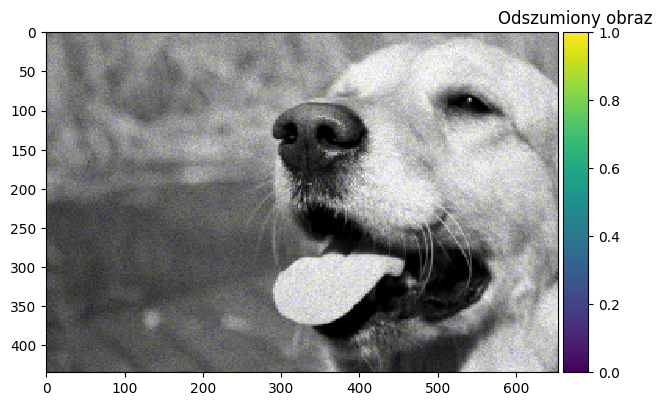

In [7]:
# Odszumianie obrazu
obraz_odszumiony = odszumienie(obraz_z_szumem)
# Wyświetlenie odszumionego obraz
io.imshow(obraz_odszumiony)
plt.title('Odszumiony obraz')
plt.show()

# Kompresja

In [8]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [9]:
def kompresja_fourier(image, wspolczynnik_kompresji=0.99):
    # Przeprowadzenie transformaty Fouriera na obrazie
    transformata_fouriera = np.fft.fft2(image)

    # Przeprowadzenie kompresji: przycięcie częstotliwości zgodnie z określonym współczynnikiem kompresji
    laczna_liczba_wspolczynnikow = transformata_fouriera.size
    liczba_wspolczynnikow_do_zachowania = int(wspolczynnik_kompresji * laczna_liczba_wspolczynnikow)

    # Posortowanie współczynników FFT względem wartości bezwzględnej
    posortowane_wspolczynniki = np.sort(np.abs(transformata_fouriera).flatten())[::-1]

    # Przycięcie współczynników
    prog = posortowane_wspolczynniki[liczba_wspolczynnikow_do_zachowania]
    przyciete_wspolczynniki_fouriera = np.where(np.abs(transformata_fouriera) < prog, 0, transformata_fouriera)

    # Odtworzenie obrazu z przyciętymi współczynnikami
    skompresowany_obraz = np.fft.ifft2(przyciete_wspolczynniki_fouriera).real

    return skompresowany_obraz


In [10]:
# Wczytanie oryginalnego obraz
obraz_oryginalny = io.imread("/content/drive/MyDrive/pies2.jpg", as_gray=True)

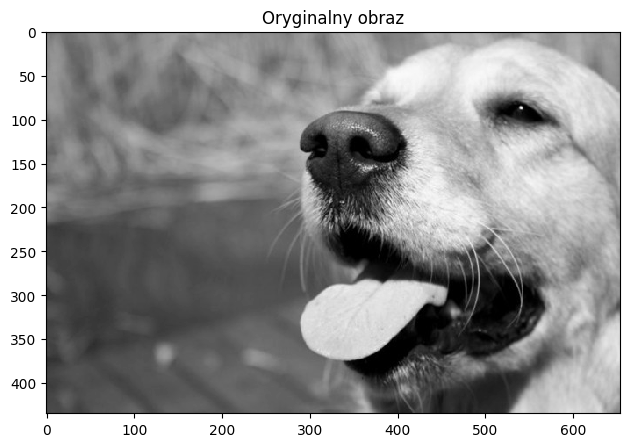

In [11]:
# Wyświetlenie oryginalnego obraz
io.imshow(obraz_oryginalny, cmap='gray')
plt.title('Oryginalny obraz')
plt.show()

In [18]:
# Kompresja obrazu za pomocą transformacji Fouriera
wspolczynnik_kompresji = 0.05
skompresowany_obraz = kompresja_fourier(obraz_oryginalny, wspolczynnik_kompresji)

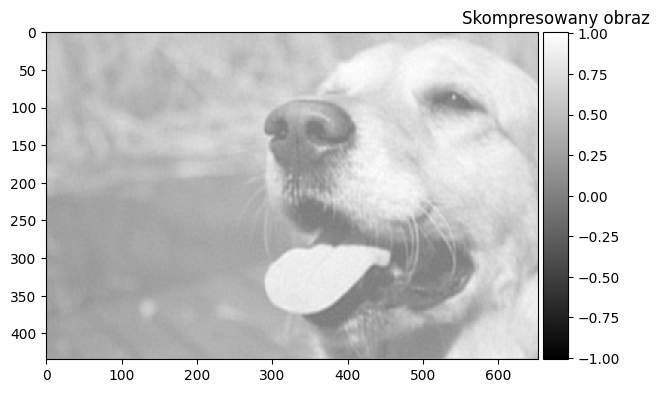

In [19]:
# Wyświetlenie skompresowanego obraz
io.imshow(skompresowany_obraz, cmap='gray')
plt.title('Skompresowany obraz')
plt.show()